In [8]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [9]:
data_no_umap = pd.read_csv("./results/results_outlier_lite.csv")
data_umap = pd.read_csv("./results/results_outlier_lite_umap.csv")
data_umap["Dim Reduc"] = "Dim-Reduc-4D"
data_no_umap["Dim Reduc"] = "No-Dim-Reduc"

In [10]:
data = pd.concat([data_umap, data_no_umap])

In [11]:
feat_name = list(data_umap["feat_name"].unique())
feat_name_map = {}
for idx, name in enumerate(feat_name):
    feat_name_map[name] = "M-"+str(idx)
data["feat_name_map"] = data["feat_name"].apply(lambda x : feat_name_map[x])
data.head()

,accuracy,precision,recall,f1,feat_name,Dim Reduc,feat_name_map
0,0.922222,0.922222,0.922222,0.922222,basic_expansion,Dim-Reduc-4D,M-0
1,0.955556,0.955556,0.955556,0.955556,basic_expansion,Dim-Reduc-4D,M-0
2,0.944444,0.944444,0.944444,0.944444,basic_expansion,Dim-Reduc-4D,M-0
3,0.922222,0.922222,0.922222,0.922222,basic_expansion,Dim-Reduc-4D,M-0
4,0.944444,0.944444,0.944444,0.944444,basic_expansion,Dim-Reduc-4D,M-0


In [12]:
umap_feat_to_keep = ["basic_expansion lsme",
 "basic_expansion lsme page_rank",
 "basic_expansion lsme page_rank degree_centrality closeness_centrality eigenvector_centrality"]
data1 = data[data["Dim Reduc"] == "No-Dim-Reduc"].copy(deep=True)
data2 = data[(data["feat_name"].isin(umap_feat_to_keep)) & (data["Dim Reduc"] == "Dim-Reduc-4D")].copy(deep=True)
data = pd.concat([data1, data2])

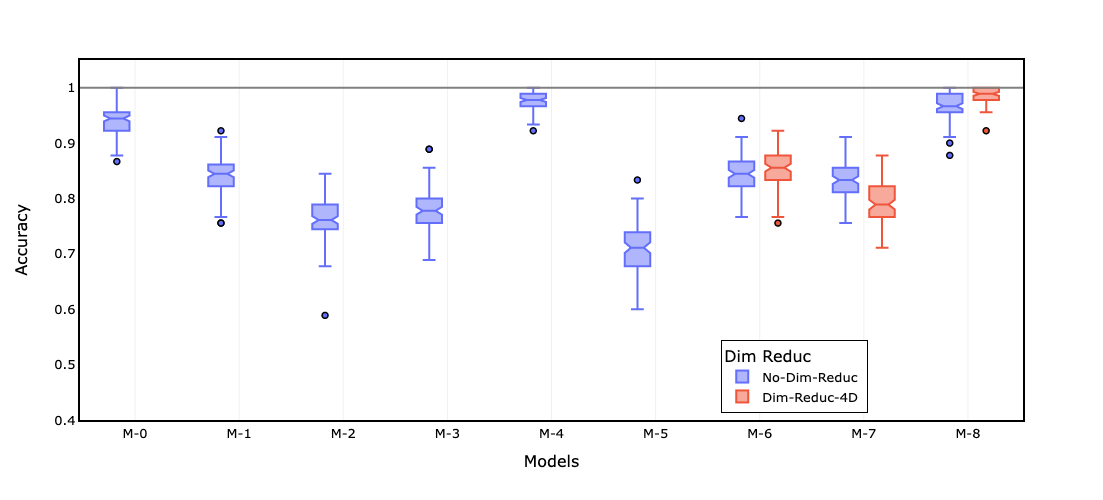

In [23]:
fig = px.box(data, x="feat_name_map", y="accuracy", color="Dim Reduc", notched=True)

# Update figure layout
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Accuracy",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Models",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2,
    ),
    width=650,
    height=500,
    font=dict(
    size=13,
    color="black")
        
)
fig.update_layout(showlegend=True)
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.02,
    xanchor="left",
    x=0.68,
    bordercolor="Black",
    borderwidth=1
))

fig.update_xaxes(visible=True, showticklabels=True)
fig.update_layout(yaxis_range=[0.4,1.05])

fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=1.0)

fig.add_hline(y=1.0, line_color="grey")

fig.show()

In [14]:
feat_name_map

{'basic_expansion': 'M-0',
 'lsme': 'M-1',
 'page_rank': 'M-2',
 'degree_centrality': 'M-3',
 'closeness_centrality': 'M-4',
 'eigenvector_centrality': 'M-5',
 'basic_expansion lsme': 'M-6',
 'basic_expansion lsme page_rank': 'M-7',
 'basic_expansion lsme page_rank degree_centrality closeness_centrality eigenvector_centrality': 'M-8'}